In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

Matplotlib is building the font cache; this may take a moment.


In [43]:
#Source of the data
url = "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data"

In [46]:
#(a)loading the data
df= pd.read_csv('C:/Users/NORDVTECH/Downloads/mbolu.csv')

In [47]:
#(b)Displaying the data frame information
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
#(c)Displaying the first tuple of the data set
print("First 5 Tuples:")

First 5 Tuples:


In [6]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [44]:
#Displaying the last tuples of the data set
print("\nLast 5 Tuples:")


Last 5 Tuples:


In [48]:
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_w

In [9]:
#(d)Displaying the desciptive statistics
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [10]:
#(e)Displaying the class label distribution
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [11]:
#(h)Category encoders?
label_encoder = LabelEncoder()

In [12]:
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

<Axes: xlabel='diagnosis', ylabel='count'>

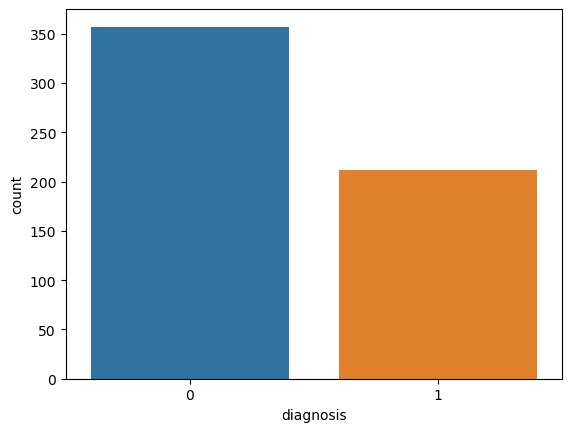

In [13]:
#(f)Using seaborn to display count plot for the class label
sns.countplot(x='diagnosis', data=df)

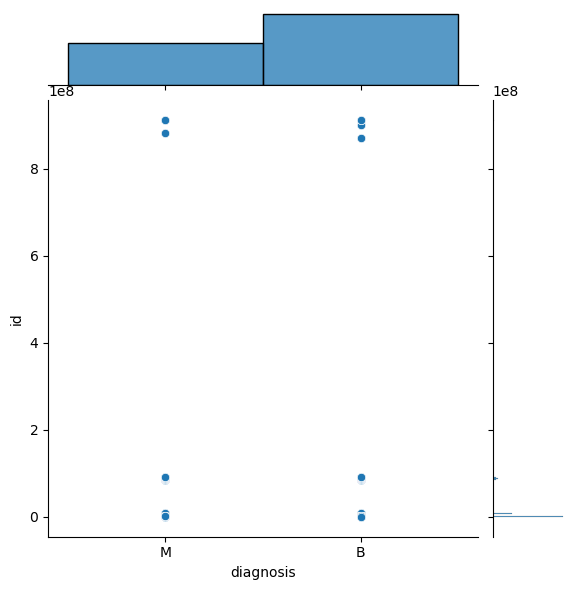

In [49]:
#(g)Using seaborn to display a joint plot with any two variables i.e.,diagnosis and id
sns.jointplot(x='diagnosis', y='id', data=df)

In [19]:
#(i)Splitting the data such that 25% is reserved testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
#(j)Showing the shape of training set
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (426, 31) (426,)


In [21]:
#Showing the shape of the test set
print("Test set shape:", X_test.shape, y_test.shape)

Test set shape: (143, 31) (143,)


Training Accuracy: 0.9859154929577465
Testing Accuracy: 0.958041958041958


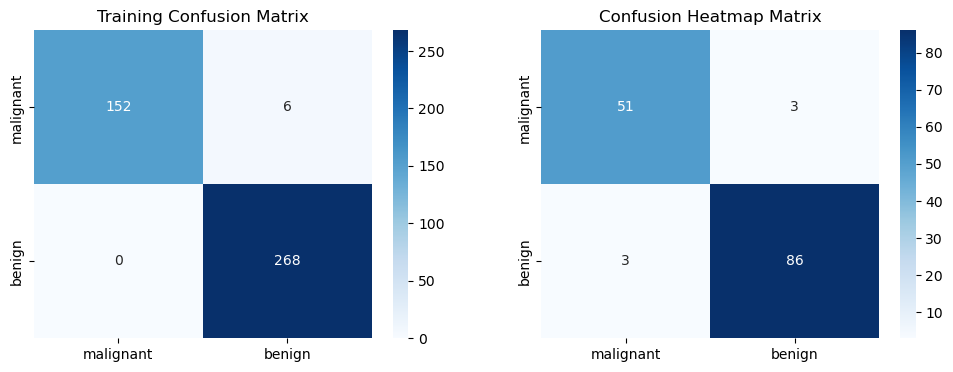

In [33]:
#(K)Training a model using K-NN
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

#(c)showing the classification accuracy
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

#(a)Showing the confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix")

#(b)Showing the heat map
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Heatmap Matrix")

plt.show()

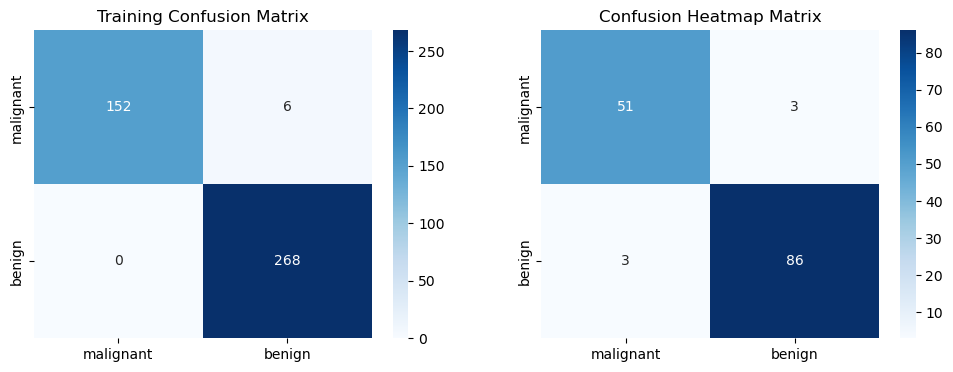

Classification Accuracy: 0.958041958041958
Training Accuracy: 0.9694835680751174
Testing Accuracy: 0.958041958041958


In [37]:
#(I)Train a model using SVM
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1) 
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Heatmap Matrix")
plt.show()

# c. Show the classification accuracy
classification_accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", classification_accuracy)

# d. Compare training and testing accuracy
training_accuracy = svm_model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)
testing_accuracy = svm_model.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

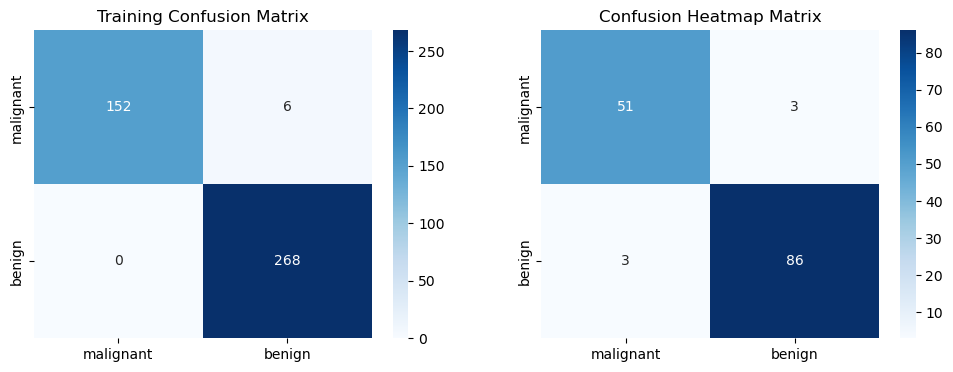

Classification Accuracy: 0.951048951048951
Training Accuracy: 1.0
Testing Accuracy: 0.951048951048951


In [38]:
#(M)Train a model using Decision Tree
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Heatmap Matrix")
plt.show()

# c. Show the classification accuracy
classification_accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", classification_accuracy)

# d. Compare training and testing accuracy
training_accuracy = dt_model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)
testing_accuracy = dt_model.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

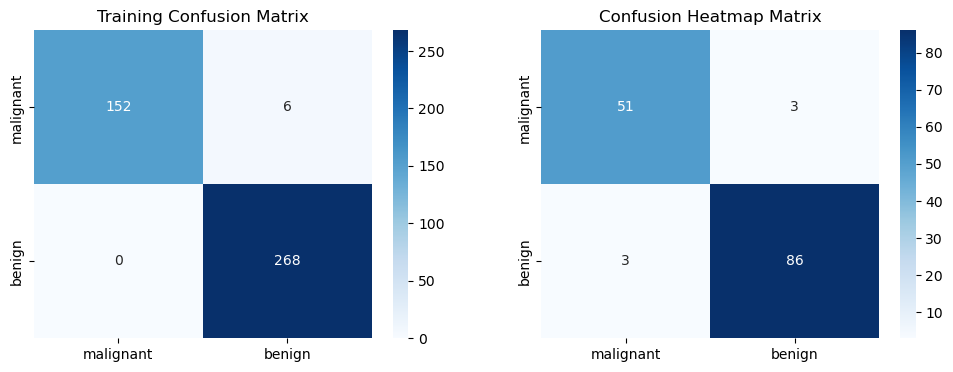

Classification Accuracy: 0.965034965034965
Training Accuracy: 1.0
Testing Accuracy: 0.965034965034965


In [41]:
#(N)Train a model using Random Forest
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Heatmap Matrix")
plt.show()

# c. Show the classification accuracy
classification_accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", classification_accuracy)

# d. Compare training and testing accuracy
training_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)
testing_accuracy = rf_model.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

Text(0.5, 0, 'ml Algorithm')

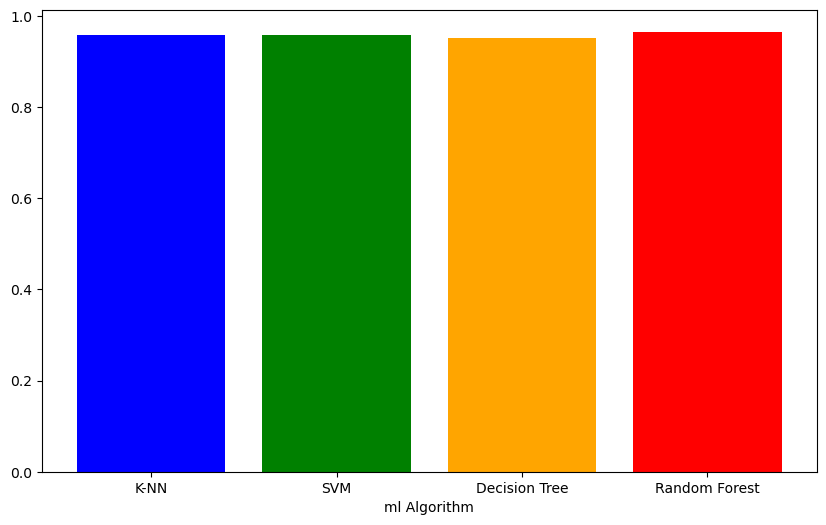

In [42]:
#(o)Demonstrating by way of a plot, which ml algorithm performs better from the results above
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Testing accuracies for each algorithm
accuracy_test_knn =  0.958041958041958 
accuracy_test_svm = 0.958041958041958  
accuracy_test_dt =   0.951048951048951 
accuracy_test_rf =   0.965034965034965 

# List of algorithms and their accuracies
algorithms = ['K-NN', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_test_knn, accuracy_test_svm, accuracy_test_dt, accuracy_test_rf]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('ml Algorithm')